# EXPLORATORY DATA ANALYSIS

In [21]:
import pandas as pd
import numpy as np

#Data Visualisation
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

Let's load the dataset into our notebook and check for the overview of our dataset using the `.head()`

In [22]:
#Loading the data
df = pd.read_csv('Data/fake_job_postings.csv')
df.head()

job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0             NaN                 NaN   
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                NaN                        NaN             Marketing   
1                NaN  Marketing and Advertising      Customer Service   
2                NaN                        NaN                   NaN   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

We will now check for the number of rows and columns in the dataset.

In [23]:
#Shape of the dataset
df.shape
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

Dataset has 17880 rows and 18 columns


In [24]:
##Checking the data type of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

**Inference** 
- job_id is more like an index and hence we can drop that column.
- `Salary type` has its data type as "object", but it should be a interger. Since we can see that there are a lot of values missing for this feature, we will not change its data type now. Instead we will look into the missing value percentage and if we decide to retain that feature for further modelling, we will change the data type then.
- All other columns have the appropriate data types and hence there is not need for any manipulation of data type needed for this dataset.

In [25]:
#Dropping the job_id column
df.drop(['job_id'], axis= 1, inplace = True)

## Checking for duplicates

Let us check for duplicates in our dataset.

In [26]:
##Checking for duplicate rows
df.duplicated().any()

True

We have duplicate rows in our dataset. Let us look into the rows which are duplicate in our dataset.

In [27]:
##Checking for duplicate rows
df[df.duplicated()]

title             location  \
146                          Customer Service Associate        US, TX, Dallas   
402                      Inside Sales Professional-Omaha        US, NE, Omaha   
495               Customer Service Associate - Part Time  US, IL, Warrenville   
1019                          Texas Captioning Assistant      US, TX, Lubbock   
1327                     Recruiter/Recruiting Assistant     US, CA, Inglewood   
...                                                  ...                  ...   
17591  Home Based Payroll Typist/Data Entry Clerks Po...   US, MT, Absarokee    
17612             Urgent Jobs (Part Time Workers Needed)      AU, NSW, Sydney   
17620  Data Entry Admin/Clerical Positions - Work Fro...        US, NE, Omaha   
17742  Data Entry Admin/Clerical Positions - Work Fro...        US, NE, Omaha   
17791  Data Entry Admin/Clerical Positions - Work Fro...        US, NE, Omaha   

      department salary_range  \
146          NaN          NaN   
402          NaN          NaN   
495          NaN          NaN   
1019   CSD Relay          NaN   
1327         NaN          NaN   
...          ...          ...   
17591   Clerical          NaN   
17612        NaN          NaN   
17620        NaN          NaN   
17742        NaN          NaN   
17791        NaN          NaN   

                                         company_profile  \
146    Novitex Enterprise Solutions, formerly Pitney ...   
402    ABC Supply Co., Inc. is the nation’s largest w...   
495    Novitex Enterprise Solutions, formerly Pitney ...   
1019   Why CSD?CSD is not only a great place to work,...   
1327                                                 NaN   
...                                                  ...   
17591                                                NaN   
17612                                                NaN   
17620                                                NaN   
17742                                                NaN   
17791                                                NaN   

                                             description  \
146    The Customer Service Associate will be based i...   
402    As a Sales Representative, you will provide as...   
495    The Customer Service Associate will be based i...   
1019   Captioning Assistants provide quick and accura...   
1327   “We believe our best investment is in our peop...   
...                                                  ...   
17591  We have several openings available in this are...   
17612  Urgent Jobs (Part Time Workers Needed)You can ...   
17620  ACCEPTING ONLINE APPLICATIONS ONLYClick Here T...   
17742  ACCEPTING ONLINE APPLICATIONS ONLYClick Here T...   
17791  ACCEPTING ONLINE APPLICATIONS ONLYClick Here T...   

                                            requirements  \
146    QualificationsMinimum of 6 months customer ser...   
402    As a Sales Representative, you must have the a...   
495    Minimum Requirements:Minimum of 6 months custo...   
1019   A minimum of a High School Diploma or equivale...   
1327                                                 NaN   
...                                                  ...   
17591  Basic computer and typing skills, ability to s...   
17612                        No any experience required.   
17620                                                NaN   
17742                                                NaN   
17791                                                NaN   

                                                benefits  telecommuting  \
146                                                  NaN              0   
402    Your benefits package as a Sales Representativ...              0   
495                                                  NaN              0   
1019   CSD offers a competitive benefits package for ...              0   
1327                                                 NaN              0   
...                                                  ...            

In [28]:
##Checking for duplicate columns
df.T.duplicated().any()

False

There are duplicate rows in this dataset and we will remove the duplicated rows before we do any further analysis.

In [29]:
#Drop the duplicated rows
df.drop_duplicates(keep ='first', inplace = True)

In [30]:
##Checking for duplicate rows after removing the duplicates
df.duplicated().any()

False

We have now removed the duplicates from our dataset.

## Feature Engineering

We can notice from the dataset overview that, `location` is given as a list of country, city and state in one feature. I would like to have it in different columns to do some exploration based on location. Hence let us now split the `location` column in to `country`, `city` and `state` columns.

In [31]:
#Splitting the list in the location column and storing it in a dataframe
location_df = df['location'].str.split(',', expand = True)
location_df

0    1              2     3     4     5     6     7     8     9    10  \
0      US   NY       New York  None  None  None  None  None  None  None  None   
1      NZ            Auckland  None  None  None  None  None  None  None  None   
2      US   IA          Wever  None  None  None  None  None  None  None  None   
3      US   DC     Washington  None  None  None  None  None  None  None  None   
4      US   FL     Fort Worth  None  None  None  None  None  None  None  None   
...    ..  ...            ...   ...   ...   ...   ...   ...   ...   ...   ...   
17875  CA   ON        Toronto  None  None  None  None  None  None  None  None   
17876  US   PA   Philadelphia  None  None  None  None  None  None  None  None   
17877  US   TX        Houston  None  None  None  None  None  None  None  None   
17878  NG   LA          Lagos  None  None  None  None  None  None  None  None   
17879  NZ    N     Wellington  None  None  None  None  None  None  None  None   

         11    12    13    14    15  
0      None  None  None  None  None  
1      None  None  None  None  None  
2      None  None  None  None  None  
3      None  None  None  None  None  
4      None  None  None  None  None  
...     ...   ...   ...   ...   ...  
17875  None  None  None  None  None  
17876  None  None  None  None  None  
17877  None  None  None  None  None  
17878  None  None  None  None  None  
17879  None  None  None  None  None  

[17599 rows x 16 columns]

It looks like there are some rows with more than three items in the location column. Let us now look into the column values of the columns 4 through 15 to understand the data better.

In [32]:
#Checking the values of location with 6 values in the list
location_df[location_df[5].notnull()]

#Checking the values of location with 13 values in the list
location_df[location_df[12].notnull()]

0    1             2            3               4            5  \
13181  US   CA   Los Angeles   California   San Francisco   California   

               6            7           8          9          10       11  \
13181   San Jose   California   Manhattan   New York   Las Vegas   Nevada   

             12        13          14           15  
13181   Phoenix   Arizona   San Diego   California

We can see that for job posting with more than 3 values in the `location` column, are for multiple locations. One Common thing that we can observe is, `country` is common for all the city/state listed in the location. So for my analysis, I am planning to use just the `country` information to keep the data consistent for all the data points.

Also, we can have a sepearate job posting row for each city in the `location`, but that would duplicate the data and may introduce some bias or magnify the bias (if any) introduces while handling NaN values. Hence I chose to drop the city and state information and retain just the `country` information.

I will insert the `country` in to the data and drop the `location` column.

In [33]:
# Insert the country information from the location dataframe into the actual dataframe
df.insert(2, 'country', location_df[0])

In [34]:
#Drop the location column
df.drop(['location'], axis= 1, inplace = True)

In [35]:
#Checking the dataframe
df.head()

title country department salary_range  \
0                           Marketing Intern      US  Marketing          NaN   
1  Customer Service - Cloud Video Production      NZ    Success          NaN   
2    Commissioning Machinery Assistant (CMA)      US        NaN          NaN   
3          Account Executive - Washington DC      US      Sales          NaN   
4                        Bill Review Manager      US        NaN          NaN   

                                     company_profile  \
0  We're Food52, and we've created a groundbreaki...   
1  90 Seconds, the worlds Cloud Video Production ...   
2  Valor Services provides Workforce Solutions th...   
3  Our passion for improving quality of life thro...   
4  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0             NaN                 NaN   
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                NaN                        NaN             Marketing   
1                NaN  Marketing and Advertising      Customer Service   
2                NaN                        NaN                   NaN   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

## Checking for missing values 

In [36]:
##Percentage of values missing in each feature
df.isnull().sum()/len(df)*100

title                   0.000000
country                 1.937610
department             64.367294
salary_range           83.936587
company_profile        18.648787
description             0.005682
requirements           15.046309
benefits               40.377294
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.478379
required_experience    39.559066
required_education     45.508268
industry               27.484516
function               36.155463
fraudulent              0.000000
dtype: float64

We have got we have 11 features which has missing values to be handled. Of the 11 fields, `salary_range` and `department` columns has more than ~50% of the data missing. Hence by the rule of thumb, I will drop those columns.

In [37]:
##Dropping job_id, salary_range columns
df.drop(['salary_range', 'department'], axis= 1, inplace = True)

Before, we handle the  remaining columns let us do some exploratory data analysis on these columns.

## Exploration Data Analysis

As this is a classification problem, I would like to check for the distribution of classes in the dataset.

In [40]:
df['fraudulent'].value_counts()

0    16743
1      856
Name: fraudulent, dtype: int64

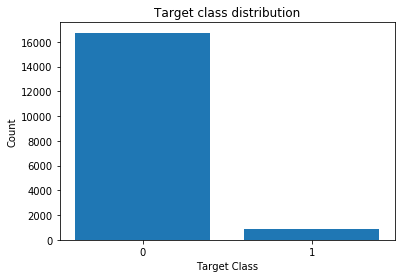

In [27]:
##Visualising the target class distribution
values, counts = np.unique(df['fraudulent'], return_counts=True)
plt.figure()
plt.bar(values, counts)
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Target class distribution')
plt.xticks(values)
plt.show()

We could see that there are just 856 jobs which are fradulent while there are 16743 jobs which are real. Lets look into the percentage of fraudulent job post in this dataset

In [17]:
df['fraudulent'].mean()

0.04863912722313768

**Target Variable - Inference:**\
From the above distribution, we can see that the classes are not equally distributed. We have only 4.9% of the dataset which are fraudulent.

This is much expected, as the job postings which are fraudulent are very less in proportion when compared to the real job postings in real time. We will build our model with the class imbalance and will check for any over-samplimg or under-sampling techniques based on the base model results.

Let us perform some EDA on the features of the dataset.

### EDA - Feature - Title 

In [41]:
#CHECKING FOR THE DIFFERENT VALUES IN THE TITLE COLUMNS
df['title'].value_counts()

English Teacher Abroad                                309
Graduates: English Teacher Abroad (Conversational)    144
Customer Service Associate                            141
English Teacher Abroad                                 94
Software Engineer                                      86
                                                     ... 
Semiconductor IP Design Experts                         1
Would you like to join our IT Team?                     1
Junior Interaction Designer                             1
Sr. Account Executive - Boston                          1
Branch Manager In Training - Wisconsin                  1
Name: title, Length: 11231, dtype: int64

We can notice from the above output that English Teacher Abroad is listed twice as two different values. This is beacause there is a space in one of the value. I will replace one of values so that it will be considered as one value.

In [42]:
#Replace the tile with space with the title value without space
df['title'].replace('English Teacher Abroad ', 'English Teacher Abroad', inplace = True)

In [43]:
#CHECKING FOR THE DIFFERENT VALUES IN THE TITLE COLUMNS
df['title'].value_counts()

English Teacher Abroad                                403
Graduates: English Teacher Abroad (Conversational)    144
Customer Service Associate                            141
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
                                                     ... 
Semiconductor IP Design Experts                         1
Would you like to join our IT Team?                     1
Junior Interaction Designer                             1
Sr. Account Executive - Boston                          1
Branch Manager In Training - Wisconsin                  1
Name: title, Length: 11230, dtype: int64

There are totally 11230 values for title column which is very difficult to view individually and group them as they do not follow any specific format. Hence I will handle it as a text data instead of making one hot encoding.

Let us check the top 10 titles in the job postings.

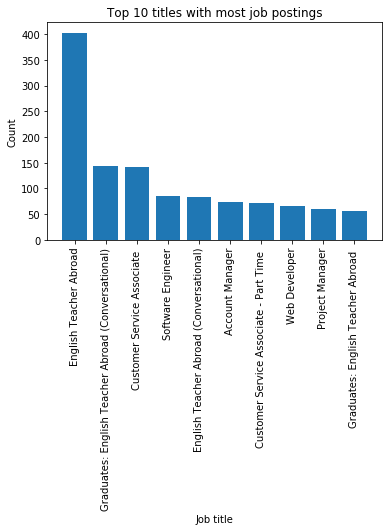

In [44]:
bar_names = df['title'].value_counts().head(10).index
bar_values = df['title'].value_counts().head(10).values

plt.figure()
plt.bar(bar_names, bar_values)
plt.xlabel('Job title')
plt.ylabel('Count')
plt.title('Top 10 titles with most job postings')
plt.xticks(rotation = 90)
plt.show()

When we visualise the top 10 title we see that 'English teacher Abroad' has appeared as 4 different values. We will replace everything with 'English teacher Abroad'

In [45]:
#Replace the tile with space with the title value without space
df['title'].replace('English Teacher Abroad (Conversational)', 'English Teacher Abroad', inplace = True)
df['title'].replace('English Teacher Abroad (Conversational) ', 'English Teacher Abroad', inplace = True)
df['title'].replace('Graduates: English Teacher Abroad (Conversational) ', 'English Teacher Abroad', inplace = True)
df['title'].replace('Graduates: English Teacher Abroad (Conversational)', 'English Teacher Abroad', inplace = True)
df['title'].replace('Graduates: English Teacher Abroad', 'English Teacher Abroad', inplace = True)
df['title'].replace('Graduates: English Teacher Abroad ', 'English Teacher Abroad', inplace = True)

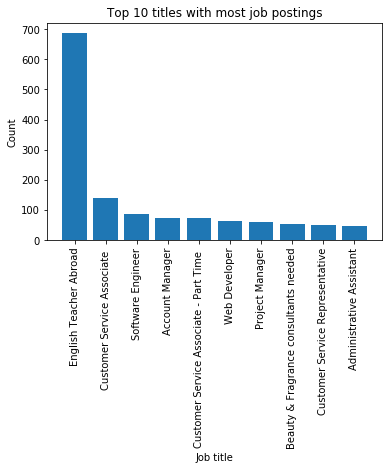

In [46]:
#Checking for the top 10 title after cleaning up the english teacher abroad title
bar_names = df['title'].value_counts().head(10).index
bar_values = df['title'].value_counts().head(10).values

plt.figure()
plt.bar(bar_names, bar_values)
plt.xlabel('Job title')
plt.ylabel('Count')
plt.title('Top 10 titles with most job postings')
plt.xticks(rotation = 90)
plt.show()

It looks there are very high job postings for 'English Teacher Abroad' title when compared to ither titles. But this could be because we combined all the title with 'English Teacher Aboard' together. Probably if we clean up each title like this we might have a different titles in the top 10 titles list. But in real time job postings, the title may differ based on the organisation and hence we will not clean up it further and stick with this result. We will consider this as just a intial analysis.

I would like to know what is the percentage of the fraudulent job postings in the top 10 job titles identified.

In [47]:
#Storing the index of the top 10 job titles in a list
title_index = list(df['title'].value_counts().head(10).index)

Since the fraudulent job postings are stored as 0's and 1's we can find the percentage of fraudulent posting by taking the mean after we group the postings by title.

In [48]:
#Storing the percentage of fraudulents jobs for each title in a dataframe
title_df = pd.DataFrame(df.groupby(['title']).mean())

#Dropping the columns other than title and fraudulent
title_df.drop(columns = (['telecommuting','has_company_logo','has_questions']), axis=1, inplace = True)


We can now check for the percentage of fraudulent job postings on the top 10 titles using the index created above in the `title_df` dataframe.

In [49]:
#percent of fraudulent jobs in the top 10 titles for job postings
title_df.loc[title_index]

fraudulent
title                                              
English Teacher Abroad                     0.000000
Customer Service Associate                 0.000000
Software Engineer                          0.000000
Account Manager                            0.027027
Customer Service Associate - Part Time     0.000000
Web Developer                              0.000000
Project Manager                            0.000000
Beauty & Fragrance consultants needed      0.000000
Customer Service Representative            0.333333
Administrative Assistant                   0.340426

**Inference - Title - Percentage of fraud job posting in top 10 titles**\
We see that there are no fraudulent job postings for most of the top 10 titles except for 'Account Manager', 'Customer Service Representative' and 'Administrative Assistant' where it has around 2.7%, 33.3% and 34% of fraudulent job posting respectively.

Of the top 10 titles with most job posting we have very high fraudulent percentage for jobs related to 'Customer Service Representative' and 'Administrative Assistant'

I would now like to check the 10 job titles with most number of fraudulent job postings.

In [50]:
#Separating the fraudulent and true posting in to different dataframe
df_fraud = df[df['fraudulent'] == 1]
df_notfraud = df[df['fraudulent'] == 0]

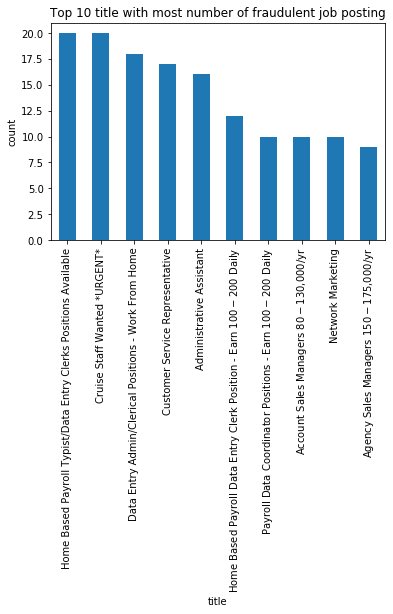

In [51]:
#Visulizing the top 10 title in fruadulent job postings
bar_names = df_fraud['title'].value_counts().head(10).index
bar_values = df_fraud['title'].value_counts().head(10).values

plt.figure()
df_fraud['title'].value_counts().head(10).plot(kind = 'bar')
plt.xlabel('title')
plt.ylabel('count')
plt.title('Top 10 title with most number of fraudulent job posting')
plt.xticks(rotation = 90)
plt.show()


**Inference - Title - Most number of fraudulent jobs**\
Interestingly, we observe that these jobs are related to payroll, customer service and Administrative positions.

In [78]:
# Job titles with high fraudulent job percentage
title_df.sort_values('fraudulent', ascending = False).head(10)

fraudulent
title                                                         
Hiring Part Time Workers For Cash Position.                1.0
Optician/Lab Technician                                    1.0
Business Operations Associate                              1.0
Business Opportunity P/T,F/T Available                     1.0
Immediate Staff Needed For Cash Positions.                 1.0
Immediate Opening: Senior Storage Administrator...         1.0
Immediate Opening : Oracle Developer for  Bahrain          1.0
Immediate Opening : Linux Administrator for Bah...         1.0
CALL CENTER REP                                            1.0
CASH In Hand Job (Part-Time Staff Needed)                  1.0

**Inference - Title - Top 10 percentage of fraudulent jobs**\
In the given dataset, it looks like all these jobs titles have 100% fraudulent postings. This might need further investigation to confirm, as this can be because these titles had just one job position for each title which is actually fraudulent. On a high level, it looks like jobs with words 'Immediate' and 'cash' are frequent in the title has a higher fraudulent post.

### EDA - Feature - Country

We know that there are Nan values in the `country` feature. I would like to replace it with "Unknown" .

In [79]:
# replacing na values in country with unknown
df["country"].fillna("unknown", inplace = True) 

In [80]:
#Checking for different values in the country column
df['country'].value_counts()

US    10460
GB     2329
GR      938
CA      450
DE      382
      ...  
SD        1
UG        1
CO        1
SI        1
PE        1
Name: country, Length: 91, dtype: int64

The jobs has been posted for 90 different countries. Let us visulise the top 10 countries with highest number of job postings

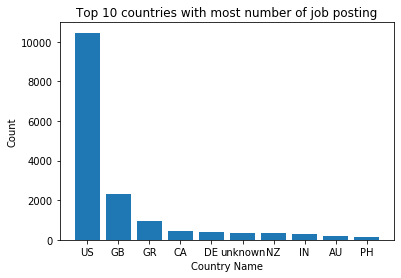

In [81]:
#Visulizing the top 10 countries for job postings
bar_names = df['country'].value_counts().head(10).index
bar_values = df['country'].value_counts().head(10).values
plt.figure()
plt.bar(bar_names,bar_values)
plt.xlabel('Country Name')
plt.ylabel('Count')
plt.title('Top 10 countries with most number of job posting')
plt.show()

**Inference - Top 10 countries in the job postings**\
It looks like most of the job postings were for jobs in US. With the great difference, GreatBritain has the second highest followed by Greece. As we did above, I would like to see the percentage of fraudlent job postings for these countries.

In [82]:
#Finding the prct of fraud by country in a new dataframe
country_df = pd.DataFrame(df.groupby(['country']).mean())
country_df.drop(columns = (['telecommuting','has_company_logo','has_questions']), axis=1, inplace = True)

In [83]:
#Storing the index value of top 10 countries
index_country = list(df['country'].value_counts().head(10).index)

In [84]:
#Using the index value in the country_df dataframe to find the prct of fraud in top 10 countries
country_df.loc[index_country]

fraudulent
country            
US         0.068929
GB         0.009875
GR         0.000000
CA         0.026667
DE         0.000000
unknown    0.055718
NZ         0.000000
IN         0.014652
AU         0.183099
PH         0.007576

**Inference - Country - Percentage of fraud in the top 10 countries**\
Except for Greece, Germany and Newzeland, all the other countries have some small percentage of fraud job posting. Of all the top 10 countries, 'Australia' has a higheset percentage of fradualent jobs (18% of fraudulent jobs).

We will now visualise the top 10 countries with most number of fraudulent job postings. 

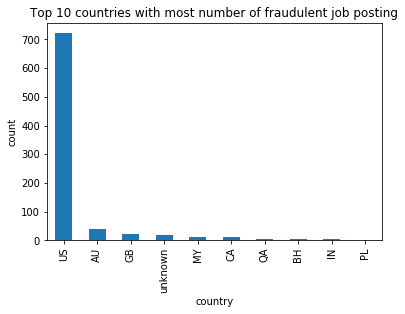

In [85]:
#Visulizing the top 10 countries in fruadulent job postings
plt.figure()
df_fraud['country'].value_counts().head(10).plot(kind = 'bar')
plt.xlabel('country')
plt.ylabel('count')
plt.title('Top 10 countries with most number of fraudulent job posting')
plt.show()

**Inference - Country - Most number of job postings**\
There are more fraudulent jobs for US which isn't surprising as it is having highest number of job posting as well. But there is something more interesting, Australia though they have very less number of jobs they have the second highest number of fradulent job posting.

In [86]:
# Top 10 Countries with highest percentage of fraudulent job posting
country_df.sort_values('fraudulent', ascending = False).head(10)

fraudulent
country            
MY         0.571429
BH         0.555556
TW         0.500000
QA         0.285714
AU         0.183099
ID         0.076923
US         0.068929
SA         0.066667
unknown    0.055718
PL         0.039474

**Inference - Country - Top 10 with highest percentage of fraudulent jobs**\
It looks like job postings for the countries Malaysia, Bahrin and Taiwan has more than 50% of it to be fraudulent.

### EDA - Feature - Employment Type

Let us now check the different categories in employment type in the given dataset.

In [87]:
#Checking for different values in the employment type column
df['employment_type'].value_counts()

Full-time    11423
Other         3653
Contract      1514
Part-time      772
Temporary      237
Name: employment_type, dtype: int64

Since we have an `employment_type` as  `Other` we use this to replace the Nan values in the `employment_type` feature. Let us replace Nan values with `Other` and check for the distribution of job postings over different employment type.

In [88]:
#Replacing the Nan values in employment_type as 'Other'
df["employment_type"].fillna("Other", inplace = True) 

In [89]:
#Checking for different values in the employment type column
df['employment_type'].value_counts()

Full-time    11423
Other         3653
Contract      1514
Part-time      772
Temporary      237
Name: employment_type, dtype: int64

I would like to visualise the number of fraudulent job postings for each employment type.

In [90]:
#Separating the fraudulent in to different dataframe
df_fraud = df[df['fraudulent'] == 1]

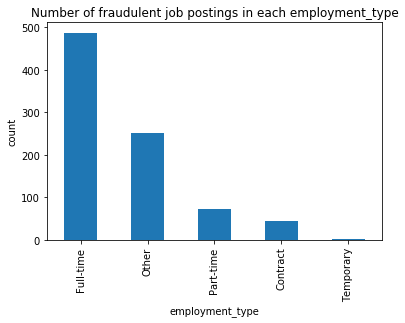

In [91]:
#Visulizing the total number of fraudulent job postings in each employment_type
plt.figure()
df_fraud['employment_type'].value_counts().head(10).plot(kind = 'bar')
plt.xlabel('employment_type')
plt.ylabel('count')
plt.title('Number of fraudulent job postings in each employment_type')
plt.show()

**Inference - Employment_type - Number of fraudulent job postings:**\
We can see that 'Full-time' jobs has the highest number of fraudulent job postings and the 'Temporary' jobs had the least number of fraudulent job postings.

I would like to visualise the percentage of fraudulent job posting in each `employment_type`.

In [92]:
#Storing the percentage of fraudulents jobs for each title in a dataframe
etype_df = pd.DataFrame(df.groupby(['employment_type']).mean())

#Dropping the columns other than title and fraudulent
etype_df.drop(columns = (['telecommuting','has_company_logo','has_questions']), axis=1, inplace = True)

In [93]:
#Storing the index of the employment types
et_index = list(df['employment_type'].value_counts().index)

<Figure size 432x288 with 0 Axes>

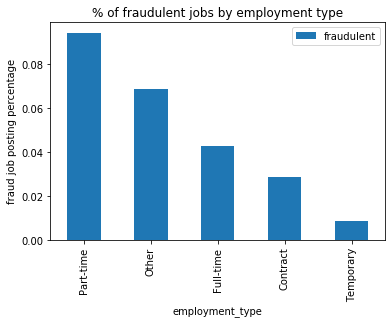

In [94]:
plt.figure()
etype_df.loc[et_index].sort_values('fraudulent', ascending = False).plot(kind = 'bar')
plt.xlabel('employment_type')
plt.ylabel('fraud job posting percentage')
plt.title('% of fraudulent jobs by employment type')
plt.show()

**Inference - Employment_type - Percentage of frauduent job posting**\
We observe that 'Part-time' jobs has the highest percentage of fraudulent job postings though they have less number of job postings when compared to the 'Full-time job postings.

### EDA - Feature - Required_experience

In [95]:
#Checking for different values in the required_experience column
df['required_experience'].value_counts()

Not Applicable      8032
Mid-Senior level    3768
Entry level         2637
Associate           2267
Director             383
Internship           372
Executive            140
Name: required_experience, dtype: int64

There are totally 7 different categories for `required_experience` feature. We notice that we have a category 'Not Applicable' which we can use it to replace Nan values in this feature.

Hence I will replace Nan values in this columns with 'Not Applicable'

In [96]:
#Replace Nan values with 'Not Applicable'
df['required_experience'].fillna('Not Applicable', inplace = True)

In [97]:
#Checking for different values in the required_experience column
df['required_experience'].value_counts()

Not Applicable      8032
Mid-Senior level    3768
Entry level         2637
Associate           2267
Director             383
Internship           372
Executive            140
Name: required_experience, dtype: int64

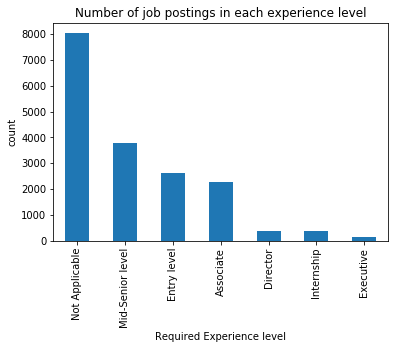

In [98]:
#Visulizing the total number of fraudulent job postings in each employment_type
plt.figure()
df['required_experience'].value_counts().head(10).plot(kind = 'bar')
plt.xlabel('Required Experience level')
plt.ylabel('count')
plt.title('Number of job postings in each experience level')
plt.show()

We will now check as which category of `required_experience` has the maximum number of fraudulent job postings.

In [99]:
#Separating the fraudulent in to different dataframe
df_fraud = df[df['fraudulent'] == 1]

In [100]:
df_fraud['required_experience'].value_counts().head(10)#.sort_values(ascending = False)

Not Applicable      487
Entry level         177
Mid-Senior level    113
Associate            42
Director             17
Internship           10
Executive            10
Name: required_experience, dtype: int64

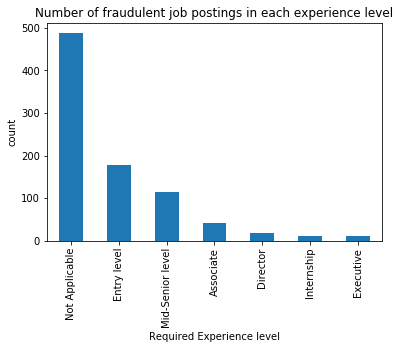

In [101]:
#Visulizing the total number of fraudulent job postings in each employment_type
plt.figure()
df_fraud['required_experience'].value_counts().head(10).plot(kind = 'bar')
plt.xlabel('Required Experience level')
plt.ylabel('count')
plt.title('Number of fraudulent job postings in each experience level')
plt.show()

**Inference - Required_experience - Number of Fraudulent job posting**\
We can clearly observe that there are more number of fraudulent job posting with the experience as 'Not Applicable', this could be because we have more number of jobs in 'Not Applicable' category.

Interestingly, 'Entry_level' category has more fraudulent posting though it is 3rd highest by the number of job posting.

To get further more information, let us now look into the percentage of fraudulent jobs in  each job category.

In [102]:
#Storing the percentage of fraudulents jobs for each title in a dataframe
req_exp_df = pd.DataFrame(df.groupby(['required_experience']).mean())

#Dropping the columns other than title and fraudulent
req_exp_df.drop(columns = (['telecommuting','has_company_logo','has_questions']), axis=1, inplace = True)


In [103]:
#Storing the index values in a variable
req_exp_index = list(df['required_experience'].value_counts().index)

In [104]:
req_exp_df.loc[req_exp_index].sort_values('fraudulent')

fraudulent
required_experience            
Associate              0.018527
Internship             0.026882
Mid-Senior level       0.029989
Director               0.044386
Not Applicable         0.060632
Entry level            0.067122
Executive              0.071429

<Figure size 432x288 with 0 Axes>

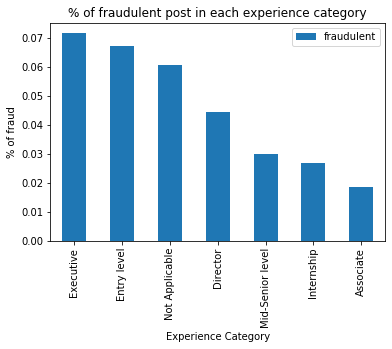

In [105]:
#plotting the percentage of fraud in each required_experience category
plt.figure()
req_exp_df.loc[req_exp_index].sort_values('fraudulent', ascending = False).plot(kind = 'bar')
plt.title('% of fraudulent post in each experience category')
plt.xlabel('Experience Category')
plt.ylabel('% of fraud')
plt.show()

**Inference - Required_experience - Percentage of Fraudulent job posting**\
We observe that 'Executive' and 'Entry level' has the highest percentage of fraud post followed by the 'Not Applicable' category.

Though 'Executive' has the lowest number of job postings it has the highest percentage of fraud post.

### EDA - Feature - Required_education

In [106]:
df['required_education'].value_counts()

Bachelor's Degree                    5099
High School or equivalent            1989
Unspecified                          1369
Master's Degree                       416
Associate Degree                      264
Certification                         165
Some College Coursework Completed     100
Professional                           73
Vocational                             47
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

We observe that there are 13 different educational values for this dataset. We have a category as 'Unspecified' which can be used to fill Nan values. I will use it to replace all the Nan values with 'Unspecified'.

In [107]:
##Replace Nan values with 'Unspecified'
df['required_education'].fillna('Unspecified', inplace = True)

We will now check the total number of jobs in each category of `required_experience` after replacing the Nan values.

In [108]:
df['required_education'].value_counts()

Unspecified                          9378
Bachelor's Degree                    5099
High School or equivalent            1989
Master's Degree                       416
Associate Degree                      264
Certification                         165
Some College Coursework Completed     100
Professional                           73
Vocational                             47
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

**Inference - Required_education - Number of jobs in each category**\
Most of the jobs have the `required_education` in the categories 'Unspecified', 'Bachelor's Degree', 'High School or equivalent'.

In [109]:
#Separating the fraudulent in to different dataframe
df_fraud = df[df['fraudulent'] == 1]

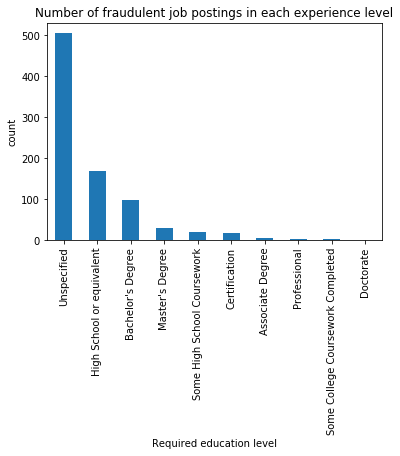

In [110]:
#Visulizing the total number of fraudulent job postings in each employment_type
plt.figure()
df_fraud['required_education'].value_counts().head(10).plot(kind = 'bar')
plt.xlabel('Required education level')
plt.ylabel('count')
plt.title('Number of fraudulent job postings in each experience level')
plt.show()

**Inference - Required_education - Number of fraudulent post**\
We observe that the number of fraudulent post in each `required_education` category is mostly dependent on the total number of post in that category.

In [111]:
#Storing the percentage of fraudulents jobs for each title in a dataframe
req_edu_df = pd.DataFrame(df.groupby(['required_education']).mean())

#Dropping the columns other than title and fraudulent
req_edu_df.drop(columns = (['telecommuting','has_company_logo','has_questions']), axis=1, inplace = True)


In [112]:
#Storing the index values in a variable
req_edu_index = list(df['required_education'].value_counts().index)

<Figure size 432x288 with 0 Axes>

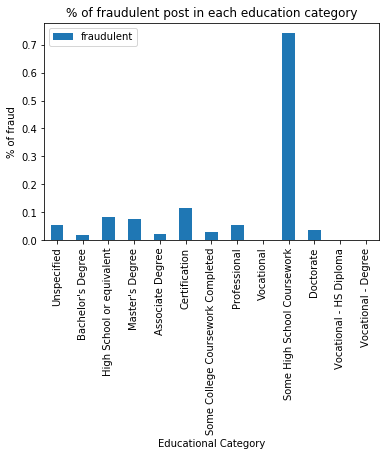

In [113]:
#plotting the percentage of fraud in each required_experience category
plt.figure()
req_edu_df.loc[req_edu_index].plot(kind = 'bar')
plt.title('% of fraudulent post in each education category')
plt.xlabel('Educational Category')
plt.ylabel('% of fraud')
plt.show()

**Inference - Required_education - percentage of fraudulent jobs for each category**\
Though there are small percentage fraudulent in each category, we see that the percentage of fraudulent jobs are very high in the 'some high school coursework' category. It looks like the scammers are targeting the lower education level , as the role for lower education level could be more generic and hence its easy to define such roles.

### EDA - Feature - Industry

In [114]:
#Checking the distribution of job posting in different indutry category
df['industry'].value_counts()

Information Technology and Services    1711
Computer Software                      1362
Internet                               1054
Education Management                    819
Marketing and Advertising               818
                                       ... 
Alternative Dispute Resolution            1
Shipbuilding                              1
Museums and Institutions                  1
Sporting Goods                            1
Wine and Spirits                          1
Name: industry, Length: 131, dtype: int64

There are 131 different values for the`Industry` columns in this dataset. There are few Nan values for `Industry` we will replace it with 'Unavailable'.

In [115]:
df['industry'].fillna('unavailable', inplace=True)

Let us now look into the top 10 industries with most number of jobs.

In [116]:
df['industry'].value_counts().head(10)

unavailable                            4837
Information Technology and Services    1711
Computer Software                      1362
Internet                               1054
Education Management                    819
Marketing and Advertising               818
Financial Services                      748
Hospital & Health Care                  483
Consumer Services                       348
Telecommunications                      326
Name: industry, dtype: int64

We will now look into the percenatge of fradulent job postings in each of the top 10 industries listed above.

In [117]:
#Storing the index of the top 10 industry
industry_index = df['industry'].value_counts().head(10).index

In [118]:
#Storing the percentage of fraudulents jobs for each industry in a dataframe
ind_df = pd.DataFrame(df.groupby(['industry']).mean())

#Dropping the columns other than title and fraudulent
ind_df.drop(columns = (['telecommuting','has_company_logo','has_questions']), axis=1, inplace = True)


<Figure size 432x288 with 0 Axes>

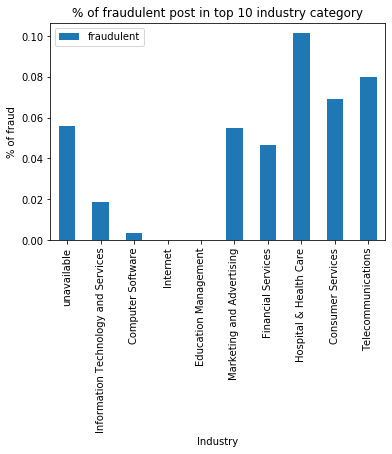

In [121]:
#plotting the percentage of fraud in each required_experience category
plt.figure()
ind_df.loc[industry_index].plot(kind = 'bar')
plt.title('% of fraudulent post in top 10 industry category')
plt.xlabel('Industry')
plt.ylabel('% of fraud')
plt.show()

**Inference - Industry - Percentage of fraud post in top 10 industries**\
We can see that `Hospital and health care` industry has almost 10% of its jobs to be fraudulent followed by the `Telecommunications` with ~8% of teh posts being fraudulent. Interestingly the jobs with the `Internet` industry does not have any fraudulent post.

Let us now check which industry has the most number of fraudulent post.

In [122]:
#Separating the fraudulent in to different dataframe
df_fraud = df[df['fraudulent'] == 1]

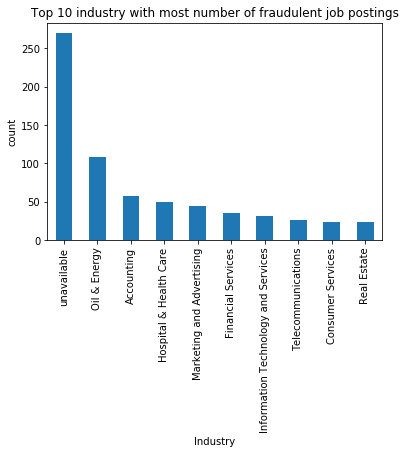

In [123]:
#Visulizing the top 10 most number of fraudulent job postings in each industry
plt.figure()
df_fraud['industry'].value_counts().head(10).plot(kind = 'bar')
plt.xlabel('Industry')
plt.ylabel('count')
plt.title('Top 10 industry with most number of fraudulent job postings')
plt.show()

**Inference - Industry - Most number of fraudulent job postings**\
It looks like  `Oil and Energy` industry has most fraudulent job post after `Unavailable`. There not much interesting trend or pattern in this feature which tells us a story.

Let us now look in to the top 10 industry with high percentage of fraudulent job posting

In [124]:
# Top 10 industries with highest percentage of fraudulent job posting
ind_df.sort_values('fraudulent', ascending = False).head(10)

fraudulent
industry                                   
Ranching                           1.000000
Military                           0.500000
Animation                          0.400000
Oil & Energy                       0.377622
Accounting                         0.358491
Computer Networking                0.279070
Leisure, Travel & Tourism          0.277778
Executive Office                   0.250000
Defense & Space                    0.222222
Business Supplies and Equipment    0.166667

**Inference - Industry - Top 10 industry with high percentage of fraudulent job postings**\
It looks like 'Ranching' industry has 100% of the jobs posted to be fraudulent but we have to check the number of job postings in this industry before we could come to any conclusion. This is followed by 'Military' and 'Oil and energy'.

It looks like 'Ranching' had just 1 job posting which is fraudulent and military had just 2 jobs posted of which 1 is fraudulent. Hence the numbers 100% and 50%.

### EDA - Feature - Function

In [125]:
df['function'].value_counts()

Information Technology    1730
Sales                     1448
Engineering               1339
Customer Service          1180
Marketing                  818
Administrative             613
Design                     336
Health Care Provider       326
Other                      325
Education                  325
Management                 306
Business Development       226
Accounting/Auditing        210
Human Resources            201
Project Management         183
Finance                    165
Consulting                 138
Art/Creative               131
Writing/Editing            131
Production                 115
Product Management         113
Quality Assurance          110
Advertising                 90
Business Analyst            83
Data Analyst                82
Public Relations            76
Manufacturing               73
General Business            68
Research                    50
Strategy/Planning           46
Legal                       44
Training                    37
Supply C

We have 37 different function values in this dataset.

There are missing values in this feature and it can be replaced with the function value 'other' which is already there in the dataset.

Let us replace the Nan values with 'Other' in the function column.

In [126]:
df['function'].fillna('Other', inplace = True)

In [127]:
df['function'].value_counts().head(10)

Other                     6688
Information Technology    1730
Sales                     1448
Engineering               1339
Customer Service          1180
Marketing                  818
Administrative             613
Design                     336
Health Care Provider       326
Education                  325
Name: function, dtype: int64

After we filled the missing values with 'Others' we can see that this category has most number of job postings followed by 'Information Technology'.

Let us now investigate the percentage of fraudulent post in the top 10 functions with most number of job postings.

In [128]:
#storing the index
fun_index = list(df['function'].value_counts().head(10).index)

In [129]:
#Storing the percentage of fraudulents jobs for each industry in a dataframe
fun_df = pd.DataFrame(df.groupby(['function']).mean())

#Dropping the columns other than title and fraudulent
fun_df.drop(columns = (['telecommuting','has_company_logo','has_questions']), axis=1, inplace = True)

<Figure size 432x288 with 0 Axes>

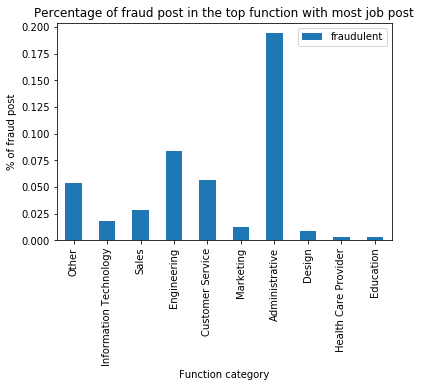

In [130]:
#Visualise the % of fraud post in the top 10 functions with most number of job posting
plt.figure()
fun_df.loc[fun_index].plot(kind = 'bar')
plt.xlabel('Function category')
plt.ylabel('% of fraud post')
plt.title('Percentage of fraud post in the top function with most job post')
plt.show()

**Inference - Function - Percentage of fraud post on top 10 department**\
Of the top 10 functions, 'Administrative' function has the highest percentage of fraudulent job post though it has comparitively very less number of jobs when compared 'Others','Information Technology' and 'sales' function.

Let us check for the fuctions with most number of fraudulent post.

In [131]:
#Separating the fraudulent in to different dataframe
df_fraud = df[df['fraudulent'] == 1]

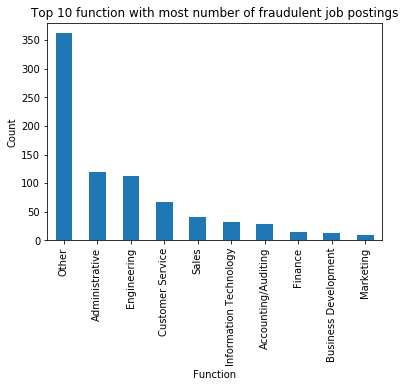

In [132]:
#Visulizing the top 10 department with most number of fraudulent job postings
plt.figure()
df_fraud['function'].value_counts().head(10).plot(kind = 'bar')
plt.xlabel('Function')
plt.ylabel('Count')
plt.title('Top 10 function with most number of fraudulent job postings')
plt.show()

**Inference - Function - Top 10 function with most fraudulent job post**\
We can see that 'Other' has the high number of fraud post, this is just a count and it could be because the 'Other' category has way to higher post than other function categories. 

As expected we have 'Administrative' and 'Engineering' functions in the top 10 with most fraud post beacuse they had a very high percentage of fraud though they had very less number of post. 

We will now visualise the functions which has the highest percentage of fradulent post. I would expect 'Administrative' to be percent in the top 10. Let us visualise.

In [133]:
# Top 10 function with highest percentage of fraudulent job posting
fun_df.sort_values('fraudulent', ascending = False).head(10)

fraudulent
function                        
Administrative          0.194127
Accounting/Auditing     0.138095
Distribution            0.125000
Financial Analyst       0.103448
Finance                 0.090909
Engineering             0.083645
Business Development    0.057522
Customer Service        0.056780
Advertising             0.055556
Project Management      0.054645

**Inference - Function - Top 10 functions with highest percentage of fraud post**\
As we discussed earlier 'Administrative' tops the list. Except for 'Engineering' and 'Customer Service' all the other functions has less than 300 posts. Probably these are the functions whic has very less job posts. 

We have anaysed all the categorical features we had in the dataset and we found in general that most of the fraud post had thier title, function, industry, required_education,Required_experience related to the entry-level jobs. This is a very high level analysis we could get from the above EDA.

Let us now analyse the text features of the dataset. For this analysis I would like to replace the Nan values in the text column with a unique token. This approach would help me identify if there is any specific pattern/association with the fraudulent job post when they have Nan values.

In [134]:
#Replacing the nana value in the text columns with unique tokens
df['company_profile'].fillna('unkc', inplace = True)
df['description'].fillna('unkd', inplace = True)
df['requirements'].fillna('unkr', inplace = True)
df['benefits'].fillna('unkb', inplace = True)

### EDA - Text Feature - Company_profile

We  will now look in the word cloud for `Company_profile` and check if there is any significant difference in the words used for fradulent and real job post.

We will also looks into the histogram of the number of characters in this features for both fake and real job post.

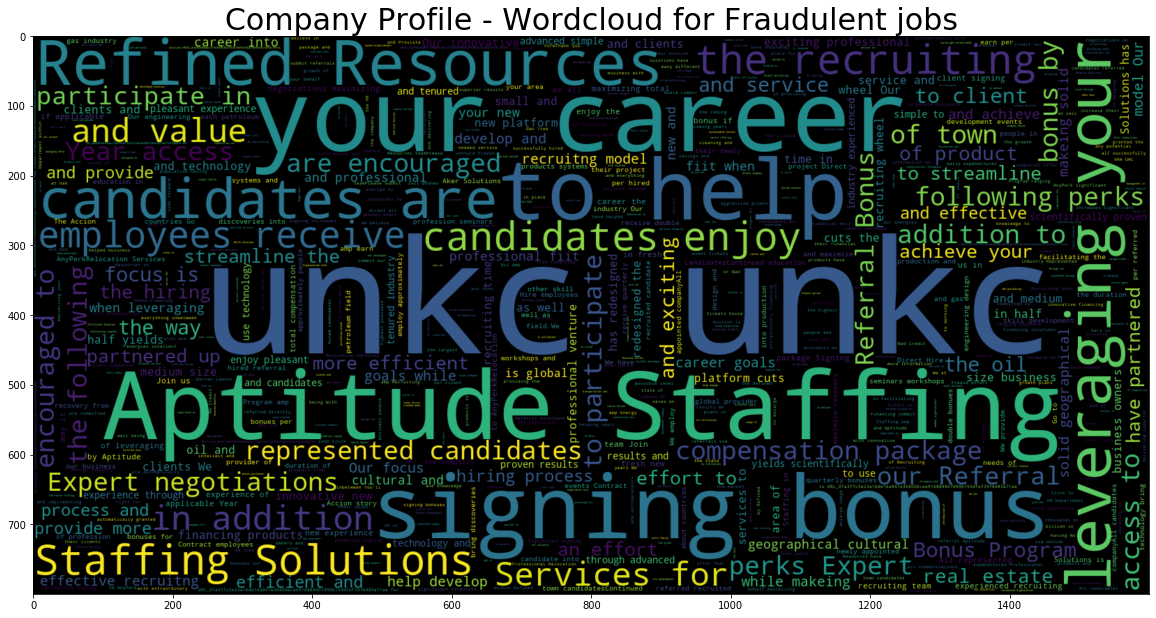

In [139]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (20,20)) # Text that is fraudulent(1)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df['company_profile'][df['fraudulent']==1]))
plt.title('Company Profile - Wordcloud for Fraudulent jobs', fontsize = 30)
plt.imshow(wc , interpolation = 'bilinear')


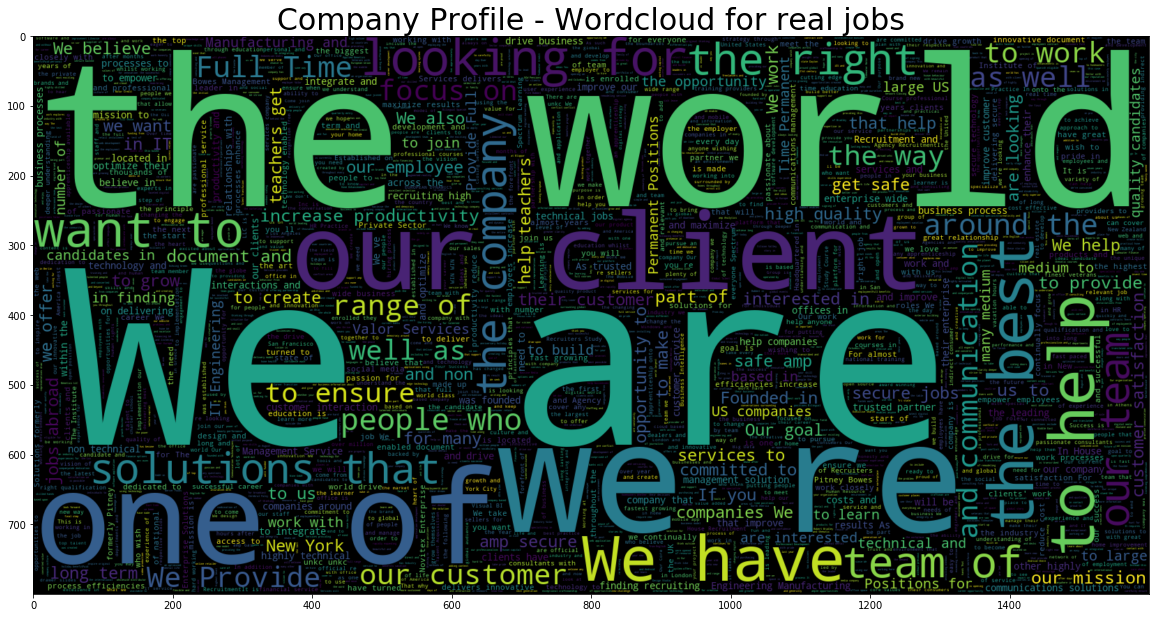

In [140]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (20,20)) # Text that is fraudulent(1)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df['company_profile'][df['fraudulent']==0]))
plt.title('Company Profile - Wordcloud for real jobs', fontsize = 30)
plt.imshow(wc , interpolation = 'bilinear')

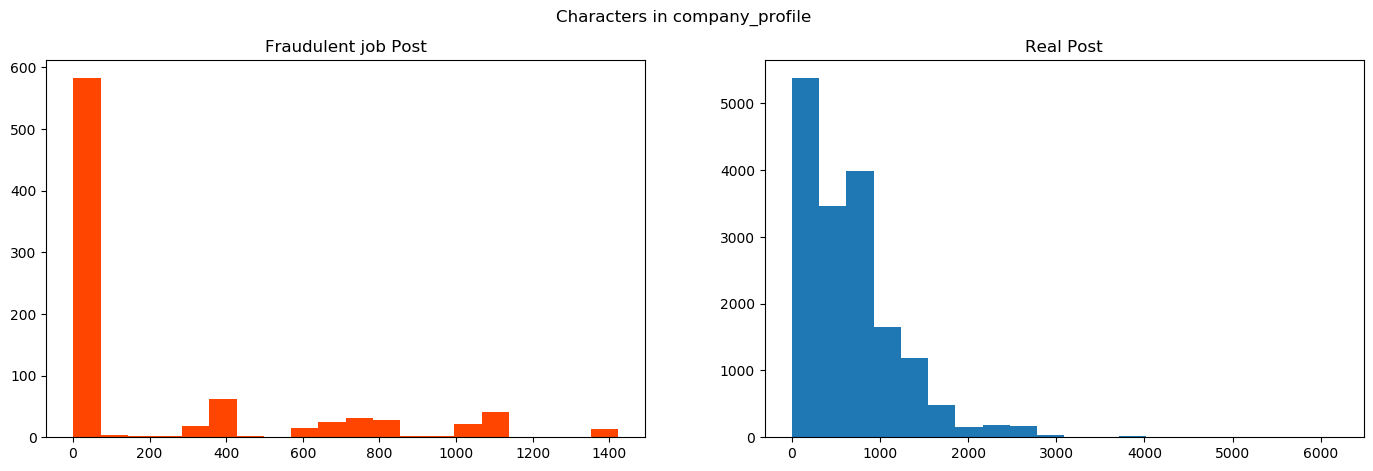

In [48]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
length=df[df["fraudulent"]==1]['company_profile'].str.len()
ax1.hist(length,bins = 20,color='orangered')
ax1.set_title('Fraudulent job Post')
length=df[df["fraudulent"]==0]['company_profile'].str.len()
ax2.hist(length, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Characters in company_profile')
plt.show()

**Inference**\
There are some interesting insights for this feature. 
1. As we replaced the Nan value with `unkc` for this feature we could clearly see that fraudulent job post predominantly did not have a company profile 
2. The fraudulent job post had words like your career, signing bonus which tries to talk about the applicant and attract them to apply for it. But the real job post had words like clients, We  which talks more about the company.
3. Fraudulent job post has very less number of characters when compared to the real job post

### EDA - Text Feature - Description

We  will now look in the word cloud for `Description` and check if there is any significant difference in the words used for fradulent and real job post.

We will also looks into the histogram of the number of characters in this features for both fake and real job post.

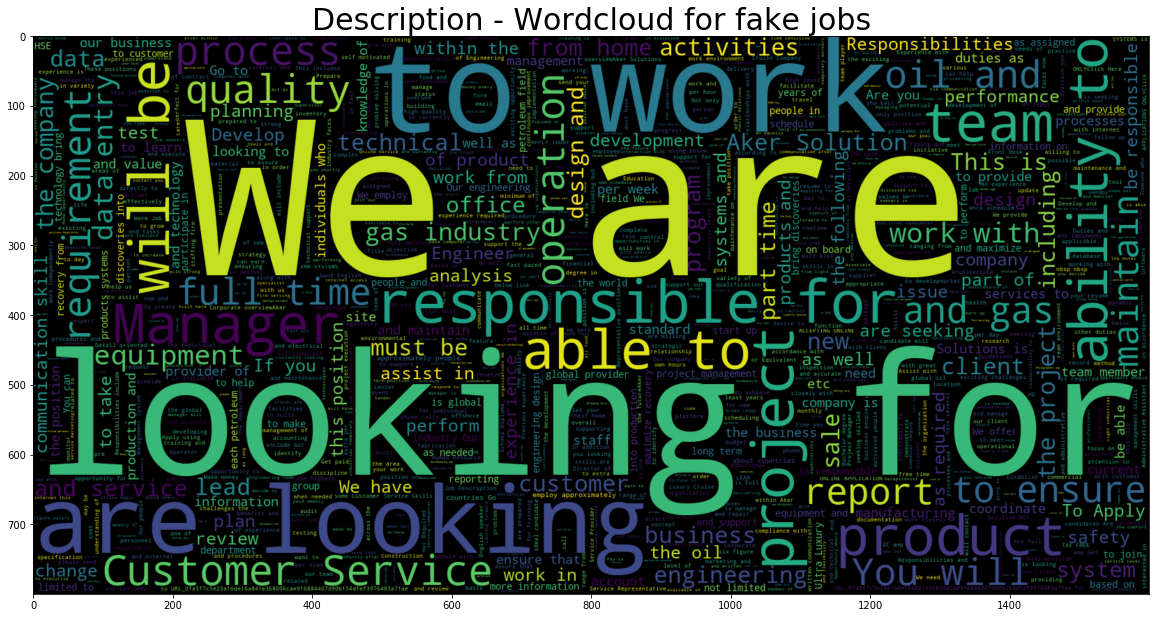

In [142]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (20,20)) # Text that is fraudulent(1)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df['description'][df['fraudulent']==1]))
plt.title('Description - Wordcloud for fake jobs', fontsize = 30)
plt.imshow(wc , interpolation = 'bilinear')

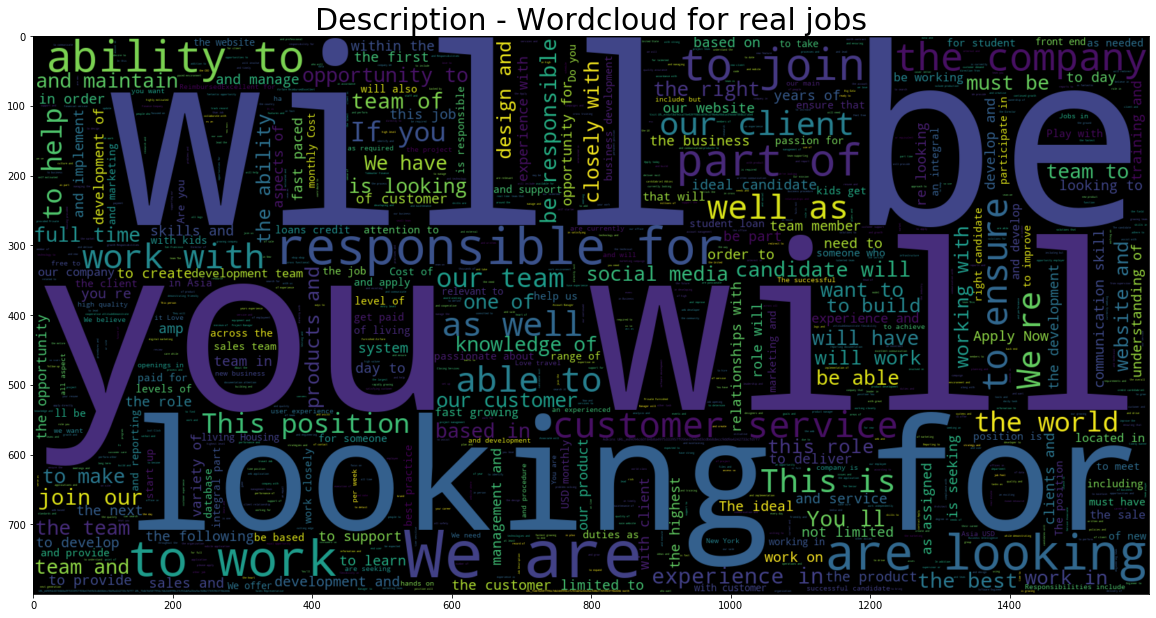

In [143]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (20,20)) # Text that is fraudulent(1)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df['description'][df['fraudulent']==0]))
plt.title('Description - Wordcloud for real jobs', fontsize = 30)
plt.imshow(wc , interpolation = 'bilinear')

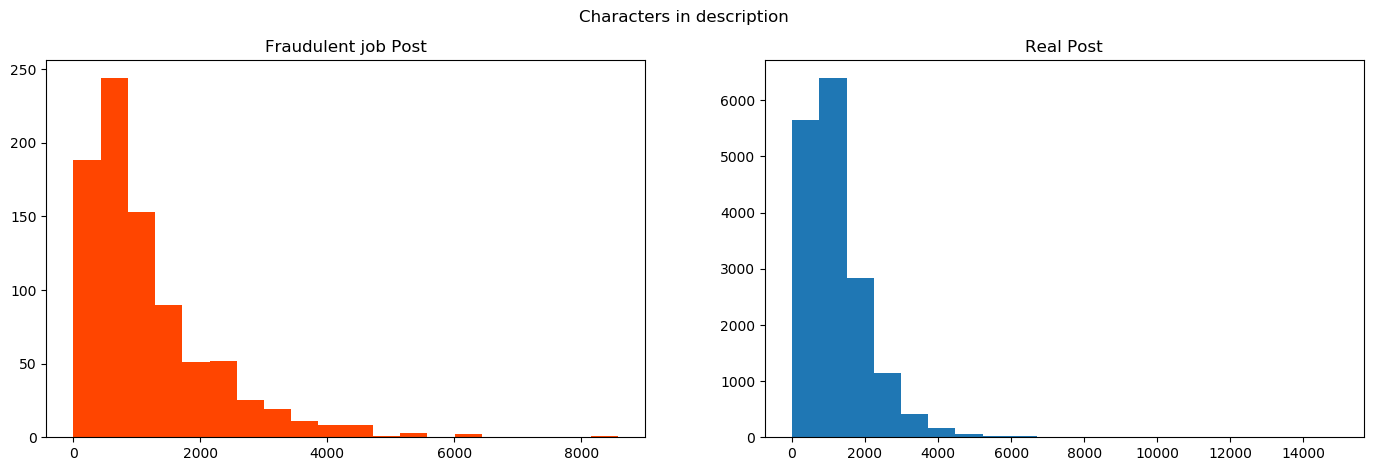

In [144]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
length=df[df["fraudulent"]==1]['description'].str.len()
ax1.hist(length,bins = 20,color='orangered')
ax1.set_title('Fraudulent job Post')
length=df[df["fraudulent"]==0]['description'].str.len()
ax2.hist(length, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Characters in description')
plt.show()

**Inference**
1. The number of characters in this feature looks similar for both fraudulent and real job posts.
2. But the word cloud shows that fraud jobs talks more what they are looking for, rather real job post talks about what the applicant would be performing in that role.

### EDA - Text Feature - Requirement

Let us perform exploratory data analysis on the `requirement` feature as we did above.

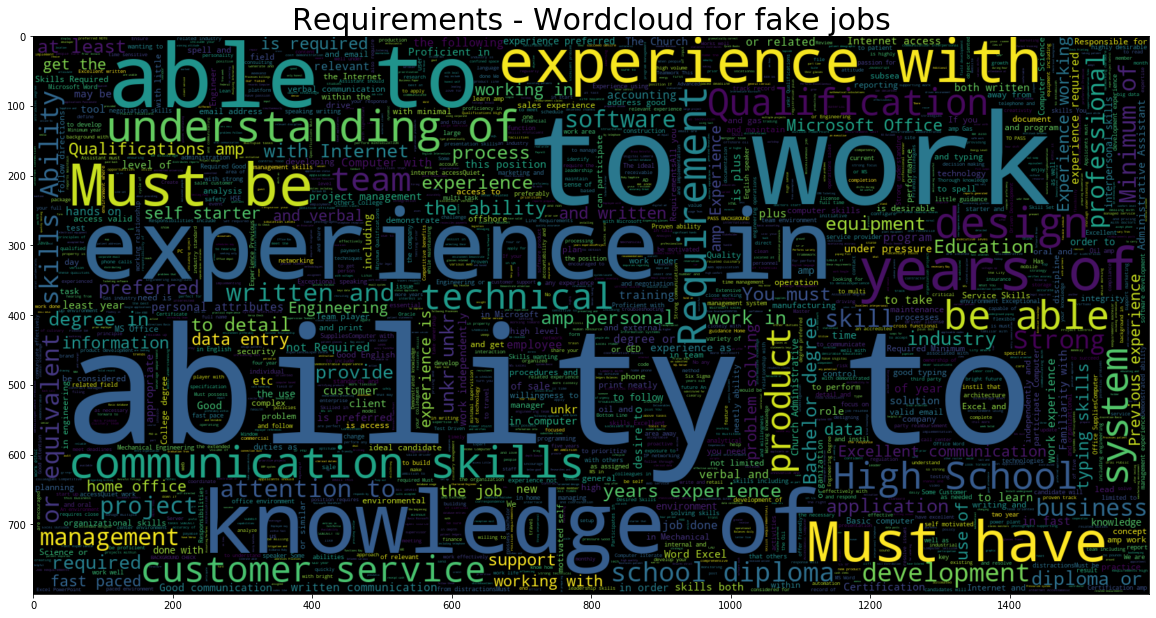

In [145]:
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (20,20)) # Text that is fraudulent(1)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000, stopwords = stopwords.words('english')).generate(" ".join(df['requirements'][df['fraudulent']==1]))
plt.title('Requirements - Wordcloud for fake jobs', fontsize = 30)
plt.imshow(wc , interpolation = 'bilinear')

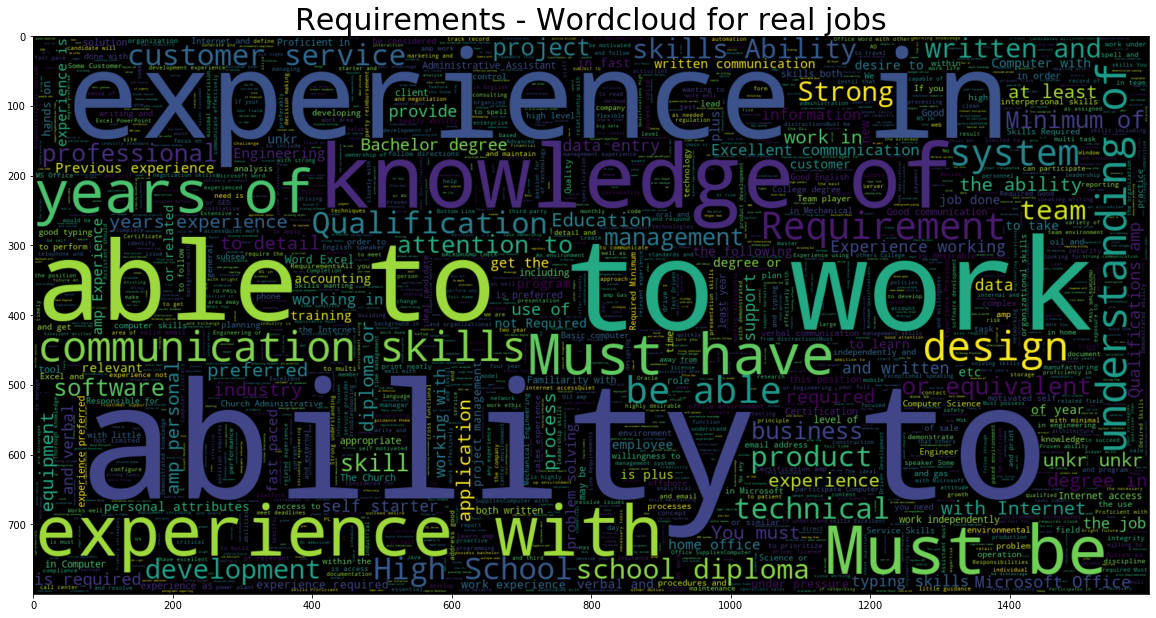

In [146]:
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (20,20)) # Text that is fraudulent(1)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000, stopwords = stopwords.words('english')).generate(" ".join(df['requirements'][df['fraudulent']==1]))
plt.title('Requirements - Wordcloud for real jobs', fontsize = 30)
plt.imshow(wc , interpolation = 'bilinear')

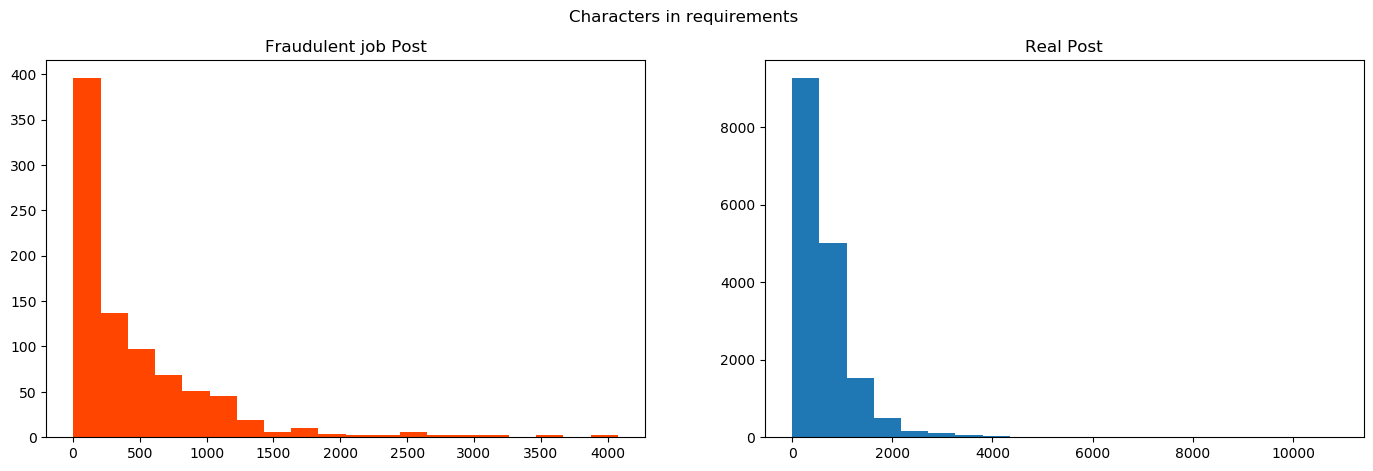

In [147]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
length=df[df["fraudulent"]==1]['requirements'].str.len()
ax1.hist(length,bins = 20,color='orangered')
ax1.set_title('Fraudulent job Post')
length=df[df["fraudulent"]==0]['requirements'].str.len()
ax2.hist(length, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Characters in requirements')
plt.show()

**Inference**\
It looks like there is not much variance in the `requirements` column as it has alomost the same words and similar number of characters for both fraud and real job posts.

### EDA - Text Feature - Benefits

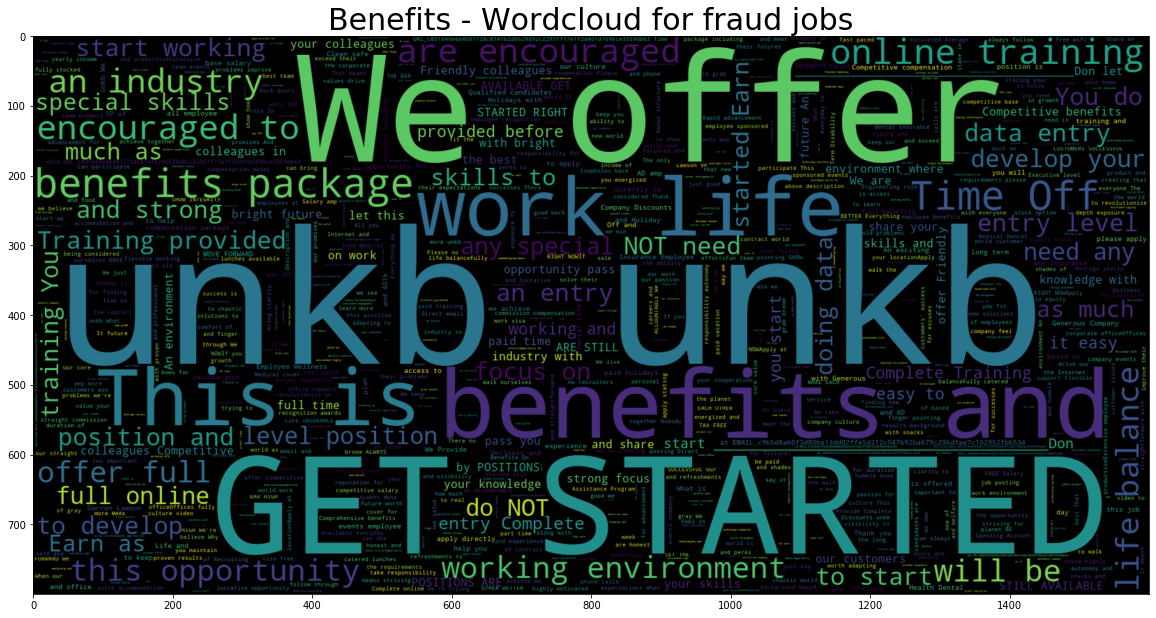

In [148]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (20,20)) # Text that is fraudulent(1)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df['benefits'][df['fraudulent']==1]))
plt.title('Benefits - Wordcloud for fraud jobs', fontsize = 30)
plt.imshow(wc , interpolation = 'bilinear')

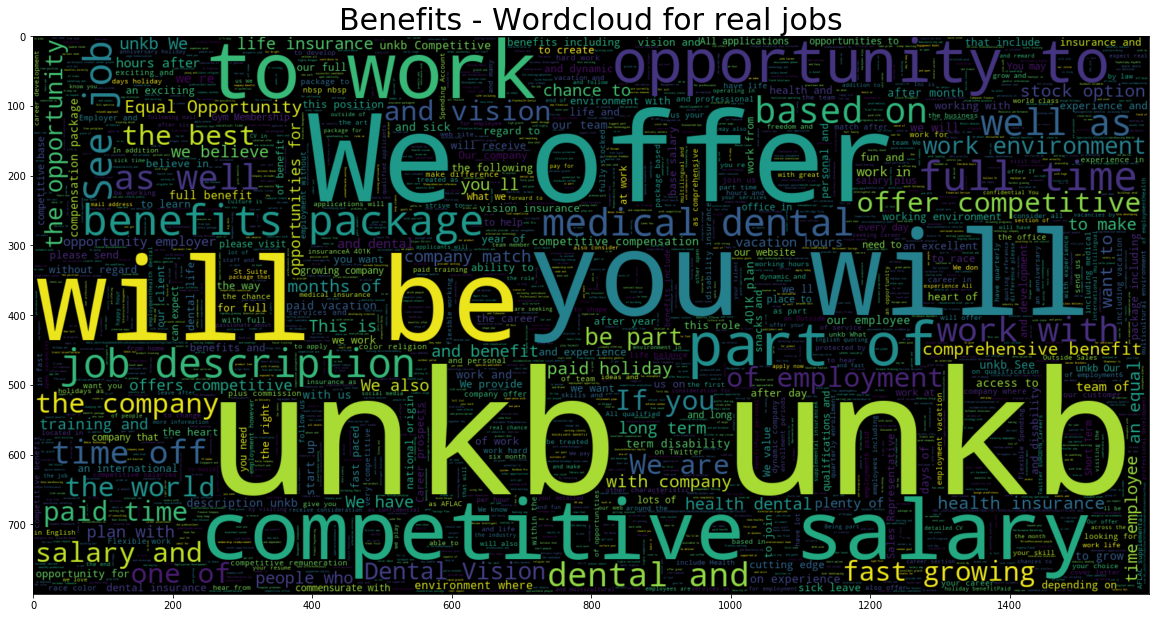

In [149]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (20,20)) # Text that is fraudulent(1)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df['benefits'][df['fraudulent']==0]))
plt.title('Benefits - Wordcloud for real jobs', fontsize = 30)
plt.imshow(wc , interpolation = 'bilinear')

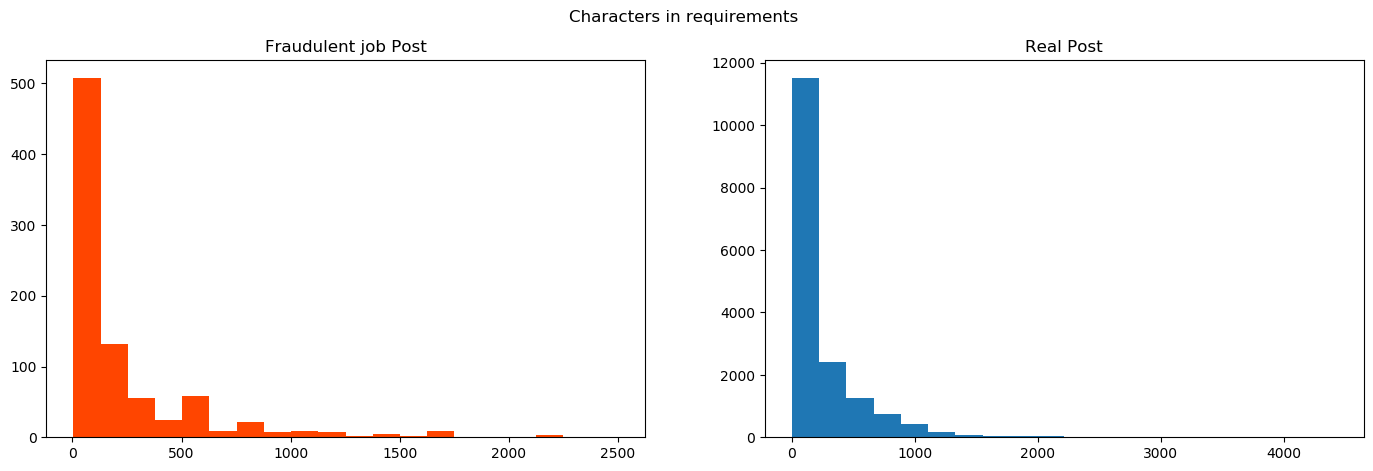

In [150]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
length=df[df["fraudulent"]==1]['benefits'].str.len()
ax1.hist(length,bins = 20,color='orangered')
ax1.set_title('Fraudulent job Post')
length=df[df["fraudulent"]==0]['benefits'].str.len()
ax2.hist(length, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Characters in requirements')
plt.show()

**Inference**\
It looks like there is not much variance in the `benefits` column as it has almost the same words and similar number of characters for both fraud and real job posts.Both real and fake job has Nan values for benefits.

### EDA - Binomial Features

Now, let's see the correlation between the binomial features and the target variable.

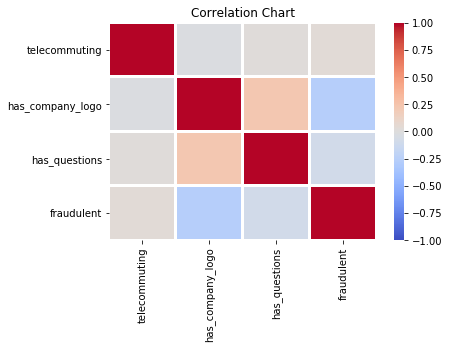

In [151]:
## Check for the correlation between the numeric fatures and the target variable
plt.figure()
sns.heatmap(df.corr(),cmap ='coolwarm',linewidth = 2,vmin = -1)
plt.title('Correlation Chart')
plt.show()

**Inference:**\
From the above correlation chart, we can see that non of the numeric features have a strong correlation with the target variable. It looks like, `has_company_logo` columns has a week negative correltion with the target variable. Also, we can see that there is either no correlation  or a very week correlation between the variable.

### Company Logo
Let us now looks into the `company_logo` feature for fraudulent and real to see if there is any pattern in it.

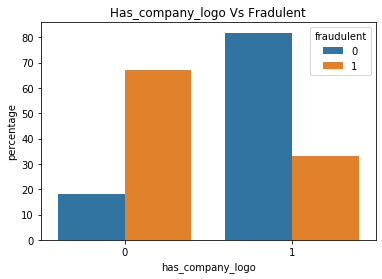

In [152]:
sns.barplot(x="has_company_logo", y="percentage", hue="fraudulent", data=df.groupby(['fraudulent'])['has_company_logo']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('has_company_logo'))
plt.title('Has_company_logo Vs Fradulent');

**Inference**\
It looks like most fraudulent job post did not have company logo while the real job post had a company logo in most cases.

### Telecommuting
Let us now looks into the `telecommuting` feature for fraudulent and real to see if there is any pattern in it.

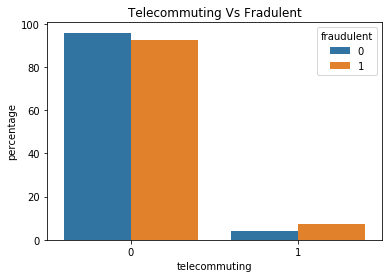

In [153]:
sns.barplot(x="telecommuting", y="percentage", hue="fraudulent", data=df.groupby(['fraudulent'])['telecommuting']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('telecommuting'))
plt.title('Telecommuting Vs Fradulent');

**Inference**\
From the above graph we can see that, there is no significant difference between the real and fake job post with respect to the `telecommuting`.

### Questions
Let us explore `has_questions` feature for fraudulent and real jobs.

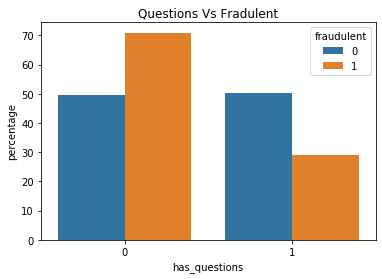

In [154]:
sns.barplot(x="has_questions", y="percentage", hue="fraudulent", data=df.groupby(['fraudulent'])['has_questions']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('has_questions'))
plt.title('Questions Vs Fradulent');

**Inference**\
It looks like there are fake job post doesn't have questions in most cases but it is not has significant as in the case of `company_logo`.

### Insights Derived from EDA

1. Most fraudulent jobs did not have a `company logo` while real jobs did have a company logo in most cases.
2. Fraudulent job `description` talks more on what they were looking for, while the real job post talks more about what the applicant would be performing in that role.
3. We observe that fraudulent job post predominantly did not have a `company profile` while the real job post did have.
4. In `company profile`, fraudulent job post had words like your career, signing bonus which tries to talk about the applicant and attract them to apply for it. But the real job post had words like clients, we  which talks more about the company.
5. Fraudulent job post has very less number of characters in the `company profile` when compared to the real job post.
6. Most fraudulent job posting have `title` related to 'Customer Service Representative' and 'Administrative Assistant'
7. There is a high percentage of fraudulent jobs for the ‘part-time’ `employment type`.
8. It looks like the jobs with ‘Administrative’ `function` in various industries has the highest percentage of fraud. As these functions could have more generic description and requirements may be this makes it easier for the scammers define it.
9. The fraudulent jobs posts are high in school level and college level `educational requirement`.
10. There are more fraudulent jobs in the ‘Entry-level’ position in `required_experience` field as it echo the fact there are more job post on lower education level.

### Feature Selection
Based on the EDA I choose to only select the features which have interesting insights. Hence I choose the following features for my modelling `title`, `country`, `company_profile`, `description`, `employment_type`,`required_education`, `required_experience`, `function`, `has_company_logo`.

I am not using `select K-best` method to chose my features as this dataset has text and categorical columns. This measure will not yield any meaningful output as each column has many categorical values and even if one of its value appear as most significant I have to chose the entire column.

We will now drop the features which are not selected as part of the feature selection process.

In [156]:
df.drop(['requirements', 'benefits', 'telecommuting', 'has_questions', 'industry'], axis = 1, inplace = True)

Now I would combine all the text columns into one feature 'text' to tokenise the data later for modelling. So let's combine the `title`, `description` and `company_profile`.

In [158]:
#Combining the text features into one column
##Making a new column with all text fields
df['text'] = df['title']+' '+df['company_profile']+' '+df['description']

We will now drop the `title`, `description` and `company_profile` as these columns are duplicated in `text`.

In [159]:
df.drop(columns = ['title','company_profile', 'description'], axis = 1, inplace = True)

In [160]:
df.head()

country  has_company_logo employment_type required_experience  \
0      US                 1           Other          Internship   
1      NZ                 1       Full-time      Not Applicable   
2      US                 1           Other      Not Applicable   
3      US                 1       Full-time    Mid-Senior level   
4      US                 1       Full-time    Mid-Senior level   

  required_education              function  fraudulent  \
0        Unspecified             Marketing           0   
1        Unspecified      Customer Service           0   
2        Unspecified                 Other           0   
3  Bachelor's Degree                 Sales           0   
4  Bachelor's Degree  Health Care Provider           0   

                                                text  
0  Marketing Intern We're Food52, and we've creat...  
1  Customer Service - Cloud Video Production 90 S...  
2  Commissioning Machinery Assistant (CMA) Valor ...  
3  Account Executive - Washington DC Our passion ...  
4  Bill Review Manager SpotSource Solutions LLC i...

In [161]:
#writing the cleaned data into a csv file to use it in different jupyter notebooks
df.to_csv('/Users/jaiganeshkannan/Desktop/DATA SCIENCE _ BRAIN STATION/Capstone project/Data/fake_job_posting_clean.csv')

We will now transform the data and run the classification models to check how it can predict the fraud jobs on imbalanced dataset. Plese refer `Imbalanced_dataset.ipynb` file for models on imbalanced dataset.